In [1]:
#https://www.cnblogs.com/pinard/p/6016029.html
import matplotlib.pyplot as plt
#内嵌画图
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [3]:
data=pd.read_csv('.\ccpp\ccpp.csv')

In [4]:
data.head()

AT      V       AP     RH      PE
0   8.34  40.77  1010.84  90.01  480.48
1  23.64  58.49  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43

In [7]:
data.shape

(9568, 5)

In [8]:
X=data[['AT','V','AP','RH']]
X.head()

AT      V       AP     RH
0   8.34  40.77  1010.84  90.01
1  23.64  58.49  1011.40  74.20
2  29.74  56.90  1007.15  41.91
3  19.07  49.69  1007.22  76.79
4  11.80  40.66  1017.13  97.20

In [9]:
y=data[['PE']]
y.head()

PE
0  480.48
1  445.75
2  438.76
3  453.09
4  464.43

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)

In [13]:
print(X_train.shape)
print(y_train.shape) 
print(X_test.shape)
print(y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


In [14]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.intercept_)
print(linreg.coef_)

[447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


In [15]:
#模型拟合测试集
y_pred=linreg.predict(X_test)
from sklearn import metrics
#用scikit-learn计算MSE
print("MSE: ",metrics.mean_squared_error(y_test, y_pred))
#用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE:  20.080401202073904
RMSE: 4.481116066570236


In [16]:
X=data[['AT','V','AP']]
y=data[['PE']]
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)
linreg=LinearRegression()
linreg.fit(X_train, y_train)
#模型拟合测试集
y_pred=linreg.predict(X_test)
#用scikit-learn计算MSE
print("MSE: ",metrics.mean_squared_error(y_test, y_pred))
#用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE:  23.208907470136236
RMSE: 4.817562399194871


In [20]:
X=data[['AT','V','AP','RH']]
y=data[['PE']]

from sklearn.model_selection import cross_val_predict
predicted=cross_val_predict(linreg,X,y,cv=10)

#用scikit-learn计算MSE
print("MSE: ",metrics.mean_squared_error(y, predicted))
#用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y,predicted)))

MSE:  20.79559746194311
RMSE: 4.560219014690316


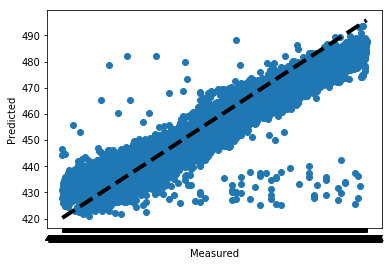

In [23]:
fig, ax=plt.subplots()
ax.scatter(y,predicted)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()